![hexagram30 small logo](https://avatars3.githubusercontent.com/u/37125516?s=100&v=4)

# Rate of Growth, Try 1

## Setup

Preperatory steps for using Maxima in Jupyter:

In [1]:
set_plot_option([svg_file, "./maxplot.svg"])$
load(draw)$

## Simple Logistics Equation

From the [Wikipedia article](https://en.wikipedia.org/wiki/Logistic_function) that describes population at time _t_:

$$P(t)=\frac{K}{1 + \frac{K - P_0}{P_0}e^{-rt}}$$

where $K$ is the carrying capacity of the area in question, $P_0$ is the population at $t=0$, and $r$ is the rate of growth. We give these some initial values here:

In [2]:
K:200;
P_0:150;
t_n:(60*60*24*365.25);
r:1/t_n;

(%o3)                                 200

(%o4)                                 150

(%o5)                             3.15576e+7

(%o6)                        3.168808781402895e-8

Note that initially, we arrived at a value for the rate trough trial and error, namely `0.0000001`, in that it turned out best results were had when it was within an order of magnitude of the inverse of the total time scale. With that realization in hand, we simply used that inverse value instead.

With the values above substituted in the equation, we get:

In [3]:
growth_eqn:(K/(1 + (K - P_0)/P_0 * %e^(-r*t)));

                                     200
(%o7)                   ------------------------------
                          - 3.168808781402895e-8 t
                        %e
                        -------------------------- + 1
                                    3

Note that we can get the latex for an expression, should we need to use it elsewhere, via the following:

In [4]:
tex(''growth_eqn)$

$$\frac{200}{\frac{e^ {- 3.168808781402895 \times 10^{-8}\,t }}{3}+1}$$


Now we can plot it over a year's timespan:

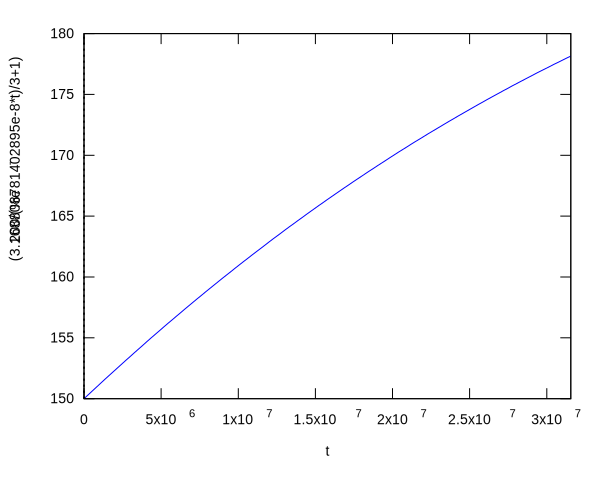

In [5]:
plot2d(growth_eqn, [t, 0, t_n])$

or over 10 years:

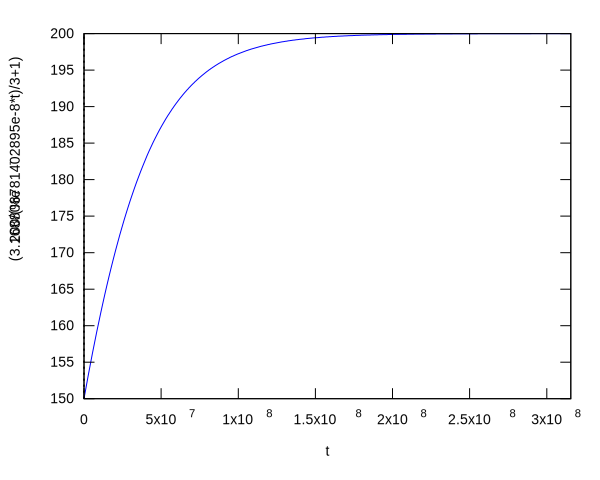

In [6]:
plot2d(growth_eqn, [t, 0, 10*t_n])$

## Oscillating Stable Population

Next, we want to think about population dynamics with times of growth and die-off. To do this, we'll simply add a periodic component to our equation:

In [7]:
osc_eqn:K/50 * sin(t*r);
eqn:growth_eqn + osc_eqn;

(%o11)                   4 sin(3.168808781402895e-8 t)

                     200
(%o12)  ------------------------------ + 4 sin(3.168808781402895e-8 t)
          - 3.168808781402895e-8 t
        %e
        -------------------------- + 1
                    3

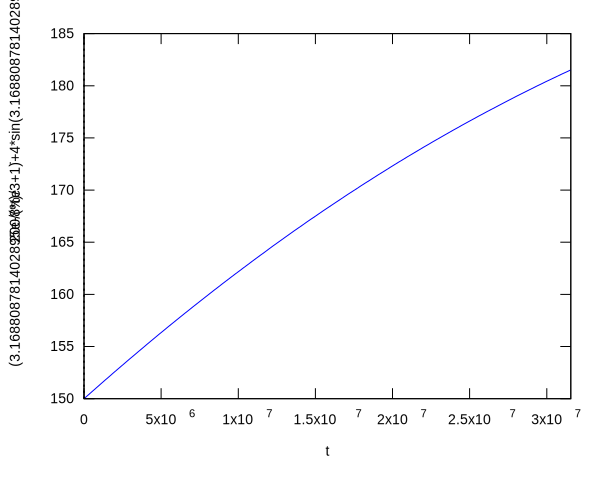

In [8]:
plot2d(eqn, [t, 0, t_n])$

Over a period of a year, we don't see much with the currently defined constants, but given 10 years, we start to see a wobble:

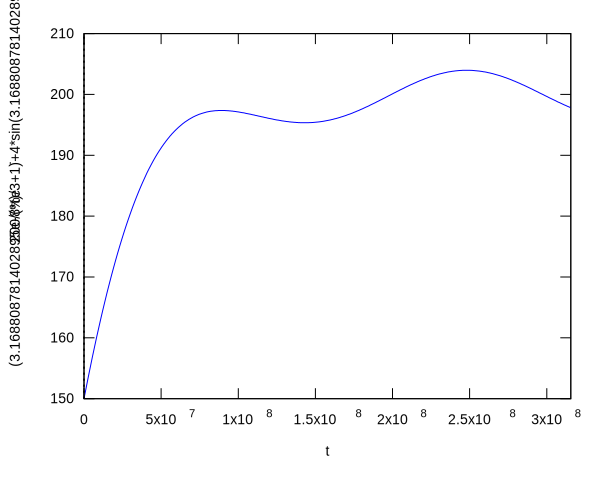

In [9]:
plot2d(eqn, [t, 0, 10*t_n])$

and at 20 years, it's even more noticible:

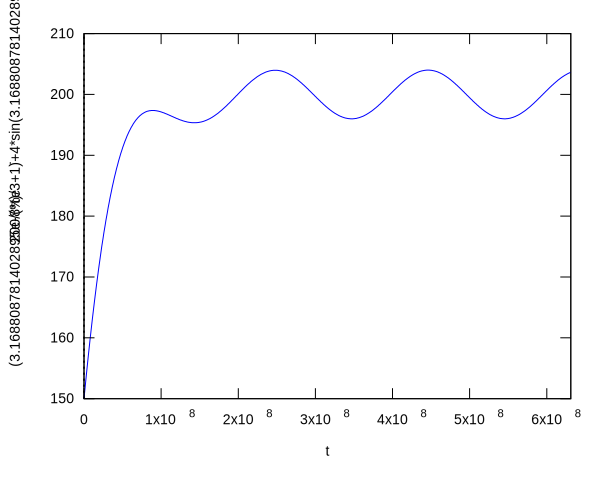

In [10]:
plot2d(eqn, [t, 0, 20*t_n])$